<a href="https://colab.research.google.com/github/gyukebox/keras-cnn-image-classification/blob/main/shell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Unzip and Load Data

In [ ]:
!tar xzf drive/MyDrive/Colab\ Notebooks/datascience-final/data.tar.gz

In [ ]:
!unzip -uq drive/MyDrive/Colab\ Notebooks/datascience-final/images.zip -d data

In [ ]:
import os
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_data = image_dataset_from_directory('data/images', labels='inferred', label_mode='categorical', validation_split=0.2, subset='training', seed=1557, color_mode='rgb', image_size=(300, 300), batch_size=64)
test_data = image_dataset_from_directory('data/images', labels='inferred', label_mode='categorical', validation_split=0.2, subset='validation', seed=1557, color_mode='rgb', image_size=(300, 300), batch_size=64)

Found 45000 files belonging to 3 classes.
Using 36000 files for training.
Found 45000 files belonging to 3 classes.
Using 9000 files for validation.


In [ ]:
classnames = train_data.class_names

classnames

['exterior', 'food', 'interior']

In [ ]:
train_data.take(1)

<TakeDataset shapes: ((None, 300, 300, 3), (None, 3)), types: (tf.float32, tf.float32)>

## 2. Define Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten

model = Sequential([
    Input(shape=(300, 300, 3), name='input_layer'),
    Conv2D(16, kernel_size=3, activation='relu', name='conv_layer1'),
    MaxPooling2D(pool_size=2, name='pool_layer1'),
    Conv2D(16, kernel_size=2, activation='relu', name='conv_layer2'),
    MaxPooling2D(pool_size=2, name='pool_layer2'),
    Conv2D(16, kernel_size=3, activation='relu', name='conv_layer3'),
    MaxPooling2D(pool_size=2, name='pool_layer3'),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax', name='output_layer')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_layer1 (Conv2D)         (None, 298, 298, 16)      448       
_________________________________________________________________
pool_layer1 (MaxPooling2D)   (None, 149, 149, 16)      0         
_________________________________________________________________
conv_layer2 (Conv2D)         (None, 148, 148, 16)      1040      
_________________________________________________________________
pool_layer2 (MaxPooling2D)   (None, 74, 74, 16)        0         
_________________________________________________________________
conv_layer3 (Conv2D)         (None, 72, 72, 16)        2320      
_________________________________________________________________
pool_layer3 (MaxPooling2D)   (None, 36, 36, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

## 3. Train Model

1. Train Model
2. Plot Loss Graph

In [ ]:
import os

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, batch_size=64, validation_data=test_data, validation_batch_size=64, epochs=5, verbose=1)

model.save('drive/MyDrive/Colab Notebooks/datascience-final/output/model-201611306')

Epoch 1/5
563/563 [==============================] - 122s 216ms/step - loss: 1.3287 - accuracy: 0.5437 - val_loss: 0.6011 - val_accuracy: 0.7486
Epoch 2/5
563/563 [==============================] - 119s 211ms/step - loss: 0.5169 - accuracy: 0.7853 - val_loss: 0.4972 - val_accuracy: 0.8039
Epoch 3/5
563/563 [==============================] - 116s 205ms/step - loss: 0.3972 - accuracy: 0.8411 - val_loss: 0.5198 - val_accuracy: 0.7896
Epoch 4/5
563/563 [==============================] - 116s 206ms/step - loss: 0.3059 - accuracy: 0.8811 - val_loss: 0.5991 - val_accuracy: 0.7864
Epoch 5/5
563/563 [==============================] - 117s 208ms/step - loss: 0.2351 - accuracy: 0.9116 - val_loss: 0.7288 - val_accuracy: 0.7616
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: drive/

In [ ]:
import matplotlib.pyplot as plt


def plot_loss_curve(history):
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()

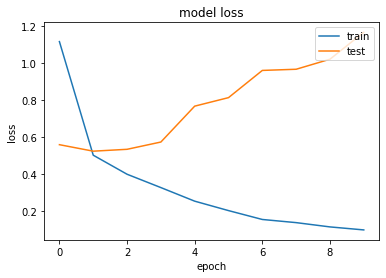

In [ ]:
plot_loss_curve(history.history)

## 4. Load Pretrained Model
3 에서 학습시킨 모델을 로드

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('drive/MyDrive/Colab Notebooks/datascience-final/output/model-201611306')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_layer1 (Conv2D)         (None, 298, 298, 16)      448       
_________________________________________________________________
pool_layer1 (MaxPooling2D)   (None, 149, 149, 16)      0         
_________________________________________________________________
conv_layer2 (Conv2D)         (None, 148, 148, 16)      1040      
_________________________________________________________________
pool_layer2 (MaxPooling2D)   (None, 74, 74, 16)        0         
_________________________________________________________________
conv_layer3 (Conv2D)         (None, 72, 72, 16)        2320      
_________________________________________________________________
pool_layer3 (MaxPooling2D)   (None, 36, 36, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

## 5. Metrics 측정
테스트 데이터에 대한 `Test Accuracy`, `Macro F1`, `Classification Report` 를 구하여 출력

In [ ]:
test_y = tf.constant([-1], dtype='int64')
predictions = tf.constant([-1], dtype='int64')

for source, target in test_data:
    batch_predictions = model.predict(source, batch_size=32)
    test_y = tf.concat([test_y, tf.argmax(target, axis=1)], axis=0)
    predictions = tf.concat([predictions, tf.argmax(batch_predictions, axis=1)], axis=0)

print(test_y.shape)
print(predictions.shape)

(9001,)
(9001,)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print('Test Accuracy: {:.2%}'.format(accuracy_score(test_y[1:], predictions[1:])))
print('Classification Report: \n{}'.format(classification_report(test_y[1:], predictions[1:])))

Test Accuracy: 76.16%
Classification Report: 
              precision    recall  f1-score   support

           0       0.75      0.47      0.58      1987
           1       0.84      0.93      0.88      3960
           2       0.67      0.73      0.70      3053

    accuracy                           0.76      9000
   macro avg       0.75      0.71      0.72      9000
weighted avg       0.76      0.76      0.75      9000



## 6. 시연